In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install publicsuffixlist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 4.0 MB/s 


In [3]:
import pandas as pd
import numpy as np
import re
from publicsuffixlist import PublicSuffixList
import gc
import math
import collections
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers import LSTM, Conv1D, MaxPooling1D, Input, Flatten
from keras import regularizers
from sklearn.metrics import classification_report, confusion_matrix
RANDOM_SEED = 1

%matplotlib inline

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Domain_name_Classifier/Data/dga_data.csv')
df

,isDGA,domain,host,subclass
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,gameoverdga
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,cryptolocker
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,cryptolocker
3,dga,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net,newgoz
4,dga,jpqftymiuver,jpqftymiuver.ru,cryptolocker
...,...,...,...,...
159995,legit,manhunt,manhunt.net,alexa
159996,legit,yupptv,yupptv.com,alexa
159997,legit,bbcmundo,bbcmundo.com,legit
159998,legit,kanogames,kanogames.com,legit


In [5]:
df.isnull().sum()

isDGA       0
domain      2
host        0
subclass    0
dtype: int64

In [6]:
df = df.drop(['domain'],axis='columns')
df.head(5)

,isDGA,host,subclass
0,dga,6xzxsw3sokvg1tc752y1a6p0af.com,gameoverdga
1,dga,glbtlxwwhbnpxs.ru,cryptolocker
2,dga,xxmamopyipbfpk.ru,cryptolocker
3,dga,zfd5szpi18i85wj9uy13l69rg.net,newgoz
4,dga,jpqftymiuver.ru,cryptolocker


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   isDGA     160000 non-null  object
 1   host      160000 non-null  object
 2   subclass  160000 non-null  object
dtypes: object(3)
memory usage: 3.7+ MB


In [8]:
df.describe()

,isDGA,host,subclass
count,160000,160000,160000
unique,2,159235,9
top,dga,ventures-africa.com,alexa
freq,80000,2,42616


In [9]:
df.columns = ['Class','Domain','Subclass']
df.head(5)

,Class,Domain,Subclass
0,dga,6xzxsw3sokvg1tc752y1a6p0af.com,gameoverdga
1,dga,glbtlxwwhbnpxs.ru,cryptolocker
2,dga,xxmamopyipbfpk.ru,cryptolocker
3,dga,zfd5szpi18i85wj9uy13l69rg.net,newgoz
4,dga,jpqftymiuver.ru,cryptolocker


In [10]:
df['Class'].unique()

array(['dga', 'legit'], dtype=object)

In [11]:
# Load Valid Top Level Domains data
import sys

topLevelDomain = []
with open('/content/drive/MyDrive/Domain_name_Classifier/Data/tlds-alpha-by-domain.txt', 'r') as content:
    for line in content:
        topLevelDomain.append((line.strip('\n')))
        
print(topLevelDomain)

['AAA', 'AARP', 'ABARTH', 'ABB', 'ABBOTT', 'ABBVIE', 'ABC', 'ABLE', 'ABOGADO', 'ABUDHABI', 'AC', 'ACADEMY', 'ACCENTURE', 'ACCOUNTANT', 'ACCOUNTANTS', 'ACO', 'ACTIVE', 'ACTOR', 'AD', 'ADAC', 'ADS', 'ADULT', 'AE', 'AEG', 'AERO', 'AETNA', 'AF', 'AFAMILYCOMPANY', 'AFL', 'AFRICA', 'AG', 'AGAKHAN', 'AGENCY', 'AI', 'AIG', 'AIGO', 'AIRBUS', 'AIRFORCE', 'AIRTEL', 'AKDN', 'AL', 'ALFAROMEO', 'ALIBABA', 'ALIPAY', 'ALLFINANZ', 'ALLSTATE', 'ALLY', 'ALSACE', 'ALSTOM', 'AM', 'AMERICANEXPRESS', 'AMERICANFAMILY', 'AMEX', 'AMFAM', 'AMICA', 'AMSTERDAM', 'ANALYTICS', 'ANDROID', 'ANQUAN', 'ANZ', 'AO', 'AOL', 'APARTMENTS', 'APP', 'APPLE', 'AQ', 'AQUARELLE', 'AR', 'ARAB', 'ARAMCO', 'ARCHI', 'ARMY', 'ARPA', 'ART', 'ARTE', 'AS', 'ASDA', 'ASIA', 'ASSOCIATES', 'AT', 'ATHLETA', 'ATTORNEY', 'AU', 'AUCTION', 'AUDI', 'AUDIBLE', 'AUDIO', 'AUSPOST', 'AUTHOR', 'AUTO', 'AUTOS', 'AVIANCA', 'AW', 'AWS', 'AX', 'AXA', 'AZ', 'AZURE', 'BA', 'BABY', 'BAIDU', 'BANAMEX', 'BANANAREPUBLIC', 'BAND', 'BANK', 'BAR', 'BARCELONA', 'BARC

In [12]:
psl = PublicSuffixList()

def ignoreVPS(domain):
    # Return the rest of domain after ignoring the Valid Public Suffixes:
    validPublicSuffix = '.' + psl.publicsuffix(domain)
    if len(validPublicSuffix) < len(domain):
         # If it has VPS
        subString = domain[0: domain.index(validPublicSuffix)]  
    elif len(validPublicSuffix) == len(domain):
        return 0
    else:
        # If not
        subString = domain
    
    return subString

def typeTo_Binary(type):
  # Convert Type to Binary variable DGA = 1, Normal = 0
  if type == 'dga':
    return 1
  else:
    return 0

def domain_length(domain):
  # Generate Domain Name Length (DNL)
  return len(domain)

def subdomains_number(domain):
  # Generate Number of Subdomains (NoS)
    subdomain = ignoreVPS(domain)
    return (subdomain.count('.') + 1)

def subdomain_length_mean(domain):
  # enerate Subdomain Length Mean (SLM) 
    subdomain = ignoreVPS(domain)
    result = (len(subdomain) - subdomain.count('.')) / (subdomain.count('.') + 1)
    return result

def has_www_prefix(domain):
  # Generate Has www Prefix (HwP)
  if domain.split('.')[0] == 'www':
    return 1
  else:
    return 0
  
def has_hvltd(domain):
  # Generate Has a Valid Top Level Domain (HVTLD)
  if domain.split('.')[len(domain.split('.')) - 1].upper() in topLevelDomain:
    return 1
  else:
    return 0
  
def contains_single_character_subdomain(domain):
  # Generate Contains Single-Character Subdomain (CSCS) 
    domain = ignoreVPS(domain)
    str_split = domain.split('.')
    minLength = len(str_split[0])
    for i in range(0, len(str_split) - 1):
        minLength = len(str_split[i]) if len(str_split[i]) < minLength else minLength
    if minLength == 1:
        return 1
    else:
        return 0

def contains_TLD_subdomain(domain):
  # Generate Contains TLD as Subdomain (CTS)
    subdomain = ignoreVPS(domain)
    str_split = subdomain.split('.')
    for i in range(0, len(str_split) - 1):
        if str_split[i].upper() in topLevelDomain:
            return 1
    return 0

def underscore_ratio(domain):
  # Generate Underscore Ratio (UR) on dataset
    subString = ignoreVPS(domain)
    result = subString.count('_') / (len(subString) - subString.count('.'))
    return result

def contains_IP_address(domain):
  # Generate Contains IP Address (CIPA) on datasetx
    splitSet = domain.split('.')
    for element in splitSet:
        if(re.match("\d+", element)) == None:
            return 0
    return 1  

def contains_digit(domain):
    """
    Contains Digits 
    """
    subdomain = ignoreVPS(domain)
    for item in subdomain:
        if item.isdigit():
            return 1
    return 0

def vowel_ratio(domain):
    """
    calculate Vowel Ratio 
    """
    VOWELS = set('aeiou')
    v_counter = 0
    a_counter = 0
    ratio = 0
    subdomain = ignoreVPS(domain)
    for item in subdomain:
        if item.isalpha():
            a_counter+=1
            if item in VOWELS:
                v_counter+=1
    if a_counter>1:
        ratio = v_counter/a_counter
    return ratio

def digit_ratio(domain):
    """
    calculate digit ratio
    """
    d_counter = 0
    counter = 0
    ratio = 0
    subdomain = ignoreVPS(domain)
    for item in subdomain:
        if item.isalpha() or item.isdigit():
            counter+=1
            if item.isdigit():
                d_counter+=1
    if counter>1:
        ratio = d_counter/counter
    return ratio
  
def prc_rrc(domain):
    """
    calculate the Ratio of Repeated Characters in a subdomain
    """
    subdomain = ignoreVPS(domain)
    subdomain = re.sub("[.]", "", subdomain)
    char_num=0
    repeated_char_num=0
    d = collections.defaultdict(int)
    for c in list(subdomain):
        d[c] += 1
    for item in d:
        char_num +=1
        if d[item]>1:
            repeated_char_num +=1
    ratio = repeated_char_num/char_num
    return ratio

def prc_rcc(domain):
    """
    calculate the Ratio of Consecutive Consonants
    """
    VOWELS = set('aeiou')
    counter = 0
    cons_counter=0
    subdomain = ignoreVPS(domain)
    for item in subdomain:
        i = 0
        if item.isalpha() and item not in VOWELS:
            counter+=1
        else:
            if counter>1:
                cons_counter+=counter
            counter=0
        i+=1
    if i==len(subdomain) and counter>1:
        cons_counter+=counter
    ratio = cons_counter/len(subdomain)
    return ratio

def prc_rcd(domain):
    """
    calculate the ratio of consecutive digits
    """
    counter = 0
    digit_counter=0
    subdomain = ignoreVPS(domain)
    for item in subdomain:
        i = 0
        if item.isdigit():
            counter+=1
        else:
            if counter>1:
                digit_counter+=counter
            counter=0
        i+=1
    if i==len(subdomain) and counter>1:
        digit_counter+=counter
    ratio = digit_counter/len(subdomain)
    return ratio

def prc_entropy(domain):
    """
    calculate the entropy of subdomain
    :param domain_str: subdomain
    :return: the value of entropy
    """
    subdomain = ignoreVPS(domain)
    # get probability of chars in string
    prob = [float(subdomain.count(c)) / len(subdomain) for c in dict.fromkeys(list(subdomain))]

    # calculate the entropy
    entropy = - sum([p * math.log(p) / math.log(2.0) for p in prob])
    return entropy

In [13]:
# Ready to generate features
def extract_features():
    df['DNL'] = df['Domain'].apply(lambda x: domain_length(x))
    df['NoS'] = df['Domain'].apply(lambda x: subdomains_number(x))
    df['SLM'] = df['Domain'].apply(lambda x: subdomain_length_mean(x))
    df['HwP'] = df['Domain'].apply(lambda x: has_www_prefix(x))
    df['HVTLD'] = df['Domain'].apply(lambda x: has_hvltd(x))
    df['CSCS'] = df['Domain'].apply(lambda x: contains_single_character_subdomain(x))
    df['CTS'] = df['Domain'].apply(lambda x: contains_TLD_subdomain(x))
    df['UR'] = df['Domain'].apply(lambda x: underscore_ratio(x))
    df['CIPA'] = df['Domain'].apply(lambda x: contains_IP_address(x))
    df['contains_digit']= df['Domain'].apply(lambda x:contains_digit(x))
    df['vowel_ratio']= df['Domain'].apply(lambda x:vowel_ratio(x))
    df['digit_ratio']= df['Domain'].apply(lambda x:digit_ratio(x))
    df['RRC']= df['Domain'].apply(lambda x:prc_rrc(x))
    df['RCC']= df['Domain'].apply(lambda x:prc_rcc(x))
    df['RCD']= df['Domain'].apply(lambda x:prc_rcd(x))
    df['Entropy']= df['Domain'].apply(lambda x:prc_entropy(x))

In [14]:
extract_features()

In [15]:
# Change Type virable from DGA and Normal to 1 and 0
df['Class'] = df['Class'].apply(lambda x: typeTo_Binary(x))

In [16]:
df.head(5)

,Class,Domain,Subclass,DNL,NoS,SLM,HwP,HVTLD,CSCS,CTS,UR,CIPA,contains_digit,vowel_ratio,digit_ratio,RRC,RCC,RCD,Entropy
0,1,6xzxsw3sokvg1tc752y1a6p0af.com,gameoverdga,30,1,26.0,0,1,0,0,0.0,0,1,0.176471,0.346154,0.238095,0.384615,0.115385,4.315824
1,1,glbtlxwwhbnpxs.ru,cryptolocker,17,1,14.0,0,1,0,0,0.0,0,0,0.000000,0.000000,0.400000,0.000000,0.000000,3.235926
2,1,xxmamopyipbfpk.ru,cryptolocker,17,1,14.0,0,1,0,0,0.0,0,0,0.214286,0.000000,0.300000,0.357143,0.000000,3.182006
3,1,zfd5szpi18i85wj9uy13l69rg.net,newgoz,29,1,25.0,0,1,0,0,0.0,0,1,0.200000,0.400000,0.315789,0.320000,0.320000,4.163856
4,1,jpqftymiuver.ru,cryptolocker,15,1,12.0,0,1,0,0,0.0,0,0,0.250000,0.000000,0.000000,0.583333,0.000000,3.584963


In [17]:
df.dtypes

Class               int64
Domain             object
Subclass           object
DNL                 int64
NoS                 int64
SLM               float64
HwP                 int64
HVTLD               int64
CSCS                int64
CTS                 int64
UR                float64
CIPA                int64
contains_digit      int64
vowel_ratio       float64
digit_ratio       float64
RRC               float64
RCC               float64
RCD               float64
Entropy           float64
dtype: object

In [18]:
df.describe()

,Class,DNL,NoS,SLM,HwP,HVTLD,CSCS,CTS,UR,CIPA,contains_digit,vowel_ratio,digit_ratio,RRC,RCC,RCD,Entropy
count,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.0,160000.0,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000
mean,0.500000,17.293425,1.000663,13.520799,0.000006,0.998644,0.000050,0.000087,0.0,0.0,0.160925,0.294171,0.056618,0.253628,0.365195,0.027043,3.119797
std,0.500002,6.569695,0.027831,6.594541,0.002500,0.036802,0.007071,0.009354,0.0,0.0,0.367463,0.141997,0.144564,0.164249,0.223817,0.088334,0.577614
min,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000
25%,0.000000,13.000000,1.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.200000,0.000000,0.142857,0.222222,0.000000,2.750000
50%,0.500000,16.000000,1.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.300000,0.000000,0.250000,0.375000,0.000000,3.121928
75%,1.000000,19.000000,1.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.400000,0.000000,0.333333,0.500000,0.000000,3.467720
max,1.000000,64.000000,3.000000,60.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.962963,0.833333,4.777317


In [19]:
df.to_csv('/content/drive/MyDrive/Domain_name_Classifier/Data/domainwith_features.csv',index=False)

start from here

In [20]:
df = pd.read_csv('/content/drive/MyDrive/Domain_name_Classifier/Data/domainwith_features.csv')

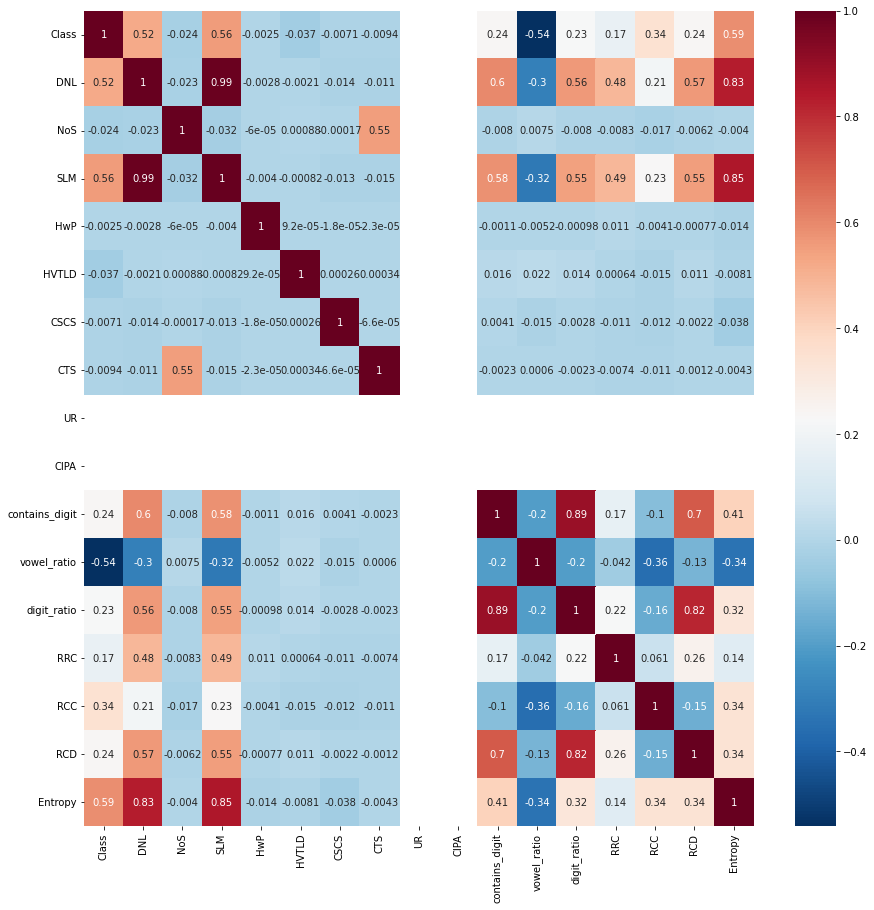

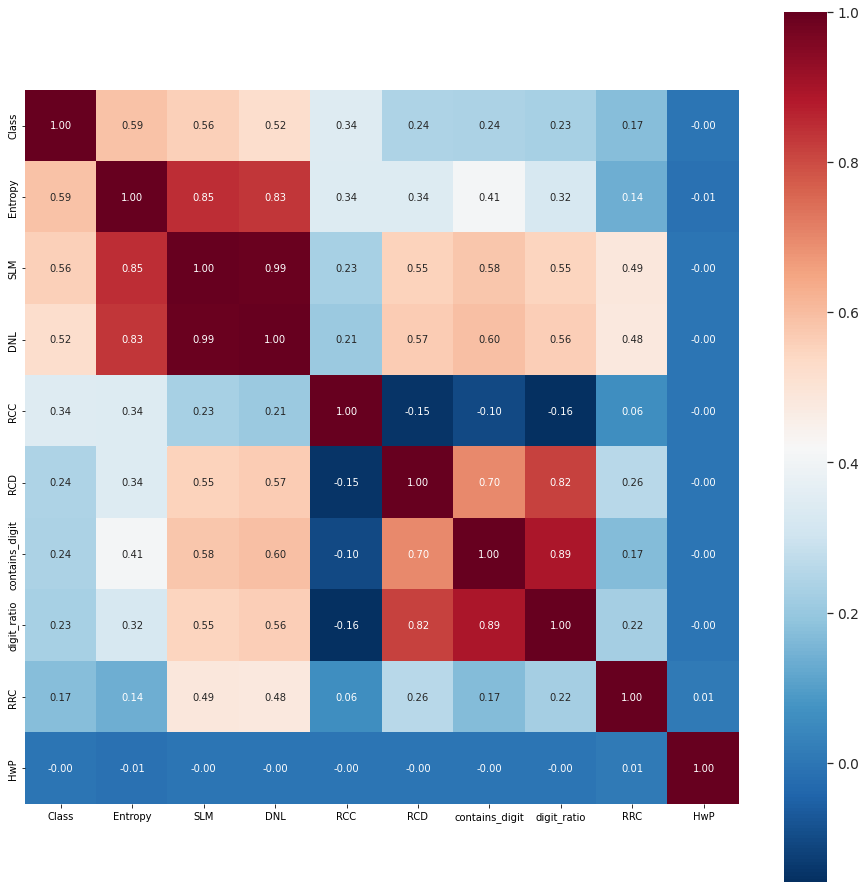

In [21]:
corrmat = df.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corrmat, annot=True, cmap= "RdBu_r")

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Class')['Class'].index
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize=(16, 16))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap = "RdBu_r", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [22]:
drop_column = {'Subclass', 'Domain', 'HwP', 'HVTLD', 'UR', 'CSCS', 'CTS','CIPA'}

In [23]:
# Drop the unnecessary columns
df = df.drop(drop_column, axis = 1)
df.head()

,Class,DNL,NoS,SLM,contains_digit,vowel_ratio,digit_ratio,RRC,RCC,RCD,Entropy
0,1,30,1,26.0,1,0.176471,0.346154,0.238095,0.384615,0.115385,4.315824
1,1,17,1,14.0,0,0.000000,0.000000,0.400000,0.000000,0.000000,3.235926
2,1,17,1,14.0,0,0.214286,0.000000,0.300000,0.357143,0.000000,3.182006
3,1,29,1,25.0,1,0.200000,0.400000,0.315789,0.320000,0.320000,4.163856
4,1,15,1,12.0,0,0.250000,0.000000,0.000000,0.583333,0.000000,3.584963


In [24]:
df.describe()

,Class,DNL,NoS,SLM,contains_digit,vowel_ratio,digit_ratio,RRC,RCC,RCD,Entropy
count,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000
mean,0.500000,17.293425,1.000663,13.520799,0.160925,0.294171,0.056618,0.253628,0.365195,0.027043,3.119797
std,0.500002,6.569695,0.027831,6.594541,0.367463,0.141997,0.144564,0.164249,0.223817,0.088334,0.577614
min,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000
25%,0.000000,13.000000,1.000000,9.000000,0.000000,0.200000,0.000000,0.142857,0.222222,0.000000,2.750000
50%,0.500000,16.000000,1.000000,12.000000,0.000000,0.300000,0.000000,0.250000,0.375000,0.000000,3.121928
75%,1.000000,19.000000,1.000000,15.000000,0.000000,0.400000,0.000000,0.333333,0.500000,0.000000,3.467720
max,1.000000,64.000000,3.000000,60.000000,1.000000,1.000000,1.000000,1.000000,0.962963,0.833333,4.777317


In [25]:
df.isnull().sum()

Class             0
DNL               0
NoS               0
SLM               0
contains_digit    0
vowel_ratio       0
digit_ratio       0
RRC               0
RCC               0
RCD               0
Entropy           0
dtype: int64

In [26]:
# Get independent variables and dependent variables
attributes = df.drop('Class', axis=1)
observed = df['Class']
attributes.shape, observed.shape

((160000, 10), (160000,))

In [27]:
# Split the dataset into training dataset and test dataset
train_X, test_X, train_y, test_y = train_test_split(attributes, observed, test_size = 0.1, random_state = RANDOM_SEED)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((144000, 10), (16000, 10), (144000,), (16000,))

Accuracy of Random Forest Model on training dataset:  92.53
Accuracy of Random Forest Model on test dataset:  91.26


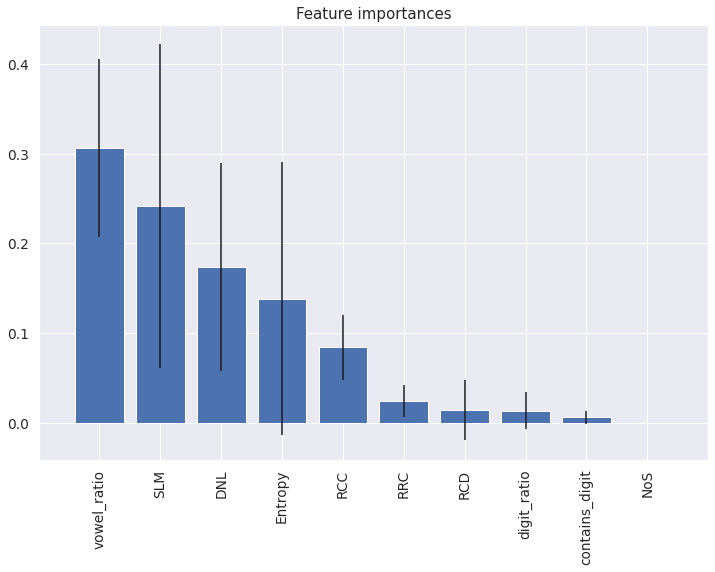

In [28]:
#Random Forest
rf = RandomForestClassifier(random_state= RANDOM_SEED)
rf.fit(train_X, train_y)

train_rf_pred = rf.predict(train_X)
test_rf_pred = rf.predict(test_X)

# Calculate the accuracy
score_rf_train = round(accuracy_score(train_y, train_rf_pred) * 100, 2)
score_rf_test = round(accuracy_score(test_y, test_rf_pred) * 100, 2)
print("Accuracy of Random Forest Model on training dataset: ", score_rf_train)
print("Accuracy of Random Forest Model on test dataset: ", score_rf_test)

# Generate the importance of each attribute
X = train_X
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in indices:
    labels.append(train_X.columns[f])      
    
# Plot the feature importances of the Random Forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()


              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7977
           1       0.94      0.88      0.91      8023

    accuracy                           0.91     16000
   macro avg       0.91      0.91      0.91     16000
weighted avg       0.91      0.91      0.91     16000



,class,sensitivity,specificity
0,0,0.880718,0.944716
1,1,0.944716,0.880718


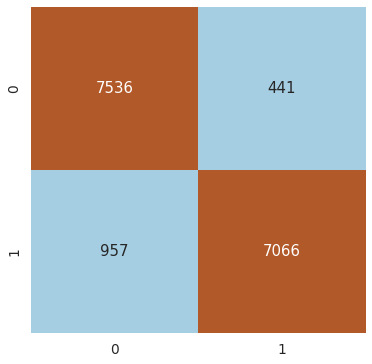

In [29]:
print(classification_report(test_y, test_rf_pred))

cmat = confusion_matrix(test_y, test_rf_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cmat, annot = True, cbar = False, cmap='Paired', fmt="d");

from sklearn.metrics import precision_recall_fscore_support
res = []
for l in range(2):
     prec,recall,_,_ = precision_recall_fscore_support(np.array(test_y)==l,
                                                  np.array(test_rf_pred)==l,
                                                  pos_label=True,average=None)
     res.append([l,recall[0],recall[1]])

pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

In [30]:
#Gaussian Naive Bayse
gnb = GaussianNB()
gnb.fit(train_X, train_y)

train_gnb_pred = gnb.predict(train_X)
test_gnb_pred = gnb.predict(test_X)

# Caluate the accuracy
score_gnb_train = round(accuracy_score(train_y, train_gnb_pred) * 100, 2)
score_gnb_test = round(accuracy_score(test_y, test_gnb_pred) * 100, 2)
print("Accuracy of Gaussian Naive Bayes on training dataset: ", score_gnb_train)
print("Accuracy of Gaussian Naive Bayes on test dataset: ", score_gnb_test)

Accuracy of Gaussian Naive Bayes on training dataset:  73.96
Accuracy of Gaussian Naive Bayes on test dataset:  74.38


              precision    recall  f1-score   support

           0       0.86      0.58      0.69      7977
           1       0.68      0.91      0.78      8023

    accuracy                           0.74     16000
   macro avg       0.77      0.74      0.74     16000
weighted avg       0.77      0.74      0.74     16000



,class,sensitivity,specificity
0,0,0.905896,0.580669
1,1,0.580669,0.905896


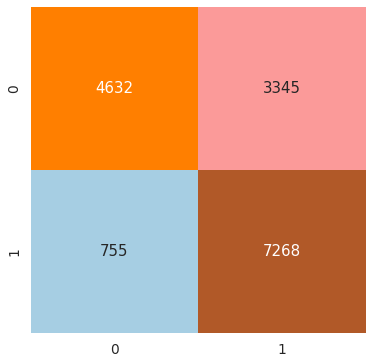

In [31]:
print(classification_report(test_y, test_gnb_pred))

cmat = confusion_matrix(test_y, test_gnb_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cmat, annot = True, cbar = False, cmap='Paired', fmt="d");

from sklearn.metrics import precision_recall_fscore_support
res = []
for l in range(2):
     prec,recall,_,_ = precision_recall_fscore_support(np.array(test_y)==l,
                                                  np.array(test_gnb_pred)==l,
                                                  pos_label=True,average=None)
     res.append([l,recall[0],recall[1]])

pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

In [32]:
#Logisitic Regression
lg = LogisticRegression(random_state=RANDOM_SEED)
lg.fit(train_X, train_y)

train_lg_pred = lg.predict(train_X)
test_lg_pred = lg.predict(test_X)

# Calculate the accuracy
score_lg_train = round(accuracy_score(train_y, train_lg_pred) * 100, 2)
score_lg_test = round(accuracy_score(test_y, test_lg_pred) * 100, 2)
print("Accuracy of Logistic Regression on training dataset: ", score_lg_train)
print("Accuracy of Logistic Regression on test dataset: ", score_lg_test)

Accuracy of Logistic Regression on training dataset:  86.13
Accuracy of Logistic Regression on test dataset:  86.64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      7977
           1       0.88      0.85      0.86      8023

    accuracy                           0.87     16000
   macro avg       0.87      0.87      0.87     16000
weighted avg       0.87      0.87      0.87     16000



,class,sensitivity,specificity
0,0,0.845943,0.887050
1,1,0.887050,0.845943


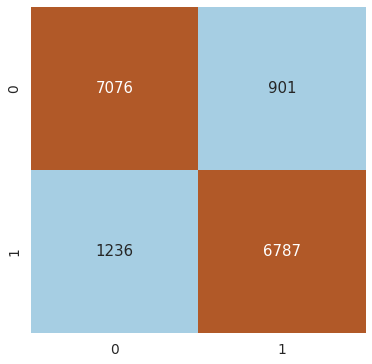

In [33]:
print(classification_report(test_y, test_lg_pred))

cmat = confusion_matrix(test_y, test_lg_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cmat, annot = True, cbar = False, cmap='Paired', fmt="d");

from sklearn.metrics import precision_recall_fscore_support
res = []
for l in range(2):
     prec,recall,_,_ = precision_recall_fscore_support(np.array(test_y)==l,
                                                  np.array(test_lg_pred)==l,
                                                  pos_label=True,average=None)
     res.append([l,recall[0],recall[1]])

pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

In [34]:
#Stacking
knn1 = KNeighborsClassifier()
lg1 = LogisticRegression()
rf2=RandomForestClassifier()

classifiers=[knn1,lg1]
sc = StackingClassifier(classifiers,meta_classifier=rf2)  
sc.fit(train_X, train_y)
train_sc_pred = sc.predict(train_X)
test_sc_pred = sc.predict(test_X)

# Caluate the accuracy
score_sc_train = round(accuracy_score(train_y, train_sc_pred) * 100, 2)
score_sc_test = round(accuracy_score(test_y, test_sc_pred) * 100, 2)
print("Accuracy of Stacking on training dataset: ", score_sc_train)
print("Accuracy of Stacking on test dataset: ", score_sc_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy of Stacking on training dataset:  90.96
Accuracy of Stacking on test dataset:  90.05


              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7977
           1       0.92      0.88      0.90      8023

    accuracy                           0.90     16000
   macro avg       0.90      0.90      0.90     16000
weighted avg       0.90      0.90      0.90     16000



,class,sensitivity,specificity
0,0,0.880344,0.920772
1,1,0.920772,0.880344


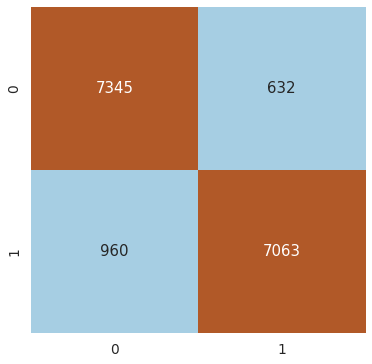

In [35]:
print(classification_report(test_y, test_sc_pred))

cmat = confusion_matrix(test_y, test_sc_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cmat, annot = True, cbar = False, cmap='Paired', fmt="d");

from sklearn.metrics import precision_recall_fscore_support
res = []
for l in range(2):
     prec,recall,_,_ = precision_recall_fscore_support(np.array(test_y)==l,
                                                  np.array(test_sc_pred)==l,
                                                  pos_label=True,average=None)
     res.append([l,recall[0],recall[1]])

pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

Testing

In [36]:
 #Testing code
def domain_pred(dname):
  df1 = pd.DataFrame(dname, columns=['Domain'])
  df1['DNL'] = df1['Domain'].apply(lambda x: domain_length(x))
  df1['NoS'] = df1['Domain'].apply(lambda x: subdomains_number(x))
  df1['SLM'] = df1['Domain'].apply(lambda x: subdomain_length_mean(x))
  df1['HwP'] = df1['Domain'].apply(lambda x: has_www_prefix(x))
  df1['HVTLD'] = df1['Domain'].apply(lambda x: has_hvltd(x))
  df1['CSCS'] = df1['Domain'].apply(lambda x: contains_single_character_subdomain(x))
  df1['CTS'] = df1['Domain'].apply(lambda x: contains_TLD_subdomain(x))
  df1['UR'] = df1['Domain'].apply(lambda x: underscore_ratio(x))
  df1['CIPA'] = df1['Domain'].apply(lambda x: contains_IP_address(x))
  df1['contains_digit']= df1['Domain'].apply(lambda x:contains_digit(x))
  df1['vowel_ratio']= df1['Domain'].apply(lambda x:vowel_ratio(x))
  df1['digit_ratio']= df1['Domain'].apply(lambda x:digit_ratio(x))
  df1['RRC']= df1['Domain'].apply(lambda x:prc_rrc(x))
  df1['RCC']= df1['Domain'].apply(lambda x:prc_rcc(x))
  df1['RCD']= df1['Domain'].apply(lambda x:prc_rcd(x))
  df1['Entropy']= df1['Domain'].apply(lambda x:prc_entropy(x))
  drop_column = {'Domain', 'HwP', 'HVTLD', 'UR', 'CSCS', 'CTS','CIPA'}
  # Drop the unnecessary columns
  df1 = df1.drop(drop_column, axis = 1)
  df1.head()
  df1.dropna(inplace=True)
  test = df1
  test_pred = rf.predict(test)
  print(test_pred)


In [39]:
#DGA = 1 and Legit = 0
dname1 = ['6xzxsw3sokvg1tc752y1a6p0af.com','avis-de-deces.net','mzapiwbcsbqiyxnlxa1hprx8n.com','plsibgabyyjbjc.ru']
domain_pred(dname1)

[1 0 1 1]
